### Que seria bueno explorar
Exploracion general de los datos.
- Valore nulos.
- Cantidad de juegos totales.
- Cantidad de usuarios.
- Total de movimientos.

Exploracion principal.
- Cantidad de juegos totales.
    - Por color y por quien inicia.
    - Juegos totales por elo.
    - Cantidad de movimientos totales.
    
Exploracion secundaria.
- Ultimos movimientos. 
- Filtrar por elo.
- Distribucion entre el elo y partidas ganadas.

In [4]:
import pandas as pd

df = pd.read_csv('Squadro_BGA_history.csv')

df.head()


,id,date,winner,loser,elo_winner,elo_loser,first_hand,conceded,record
0,565894735,2024-09-22 07:32:00,SOUL_CHICKEN_EATER,yyyoung,100,100,yyyoung,False,y5r1y1r2y4r2y5r2y5r4y3r4y3r3y3r3y3r1y3r3y1r3y3...
1,565895583,2024-09-22 07:27:00,yyyoung,SOUL_CHICKEN_EATER,118,66,SOUL_CHICKEN_EATER,False,r4y5r4y5r5y5r3y3r3y3r2y1r5y4r3y1r2y2r1y2r3y1r1...
2,565807448,2024-09-22 02:28:00,gradamical,kapa11,116,38,gradamical,False,r5y4r5y3r5y5r5y5r3y3r3y3r3y2r1y2r2y1r2y2r1y2r1...
3,565805924,2024-09-22 02:20:00,gradamical,kapa11,108,38,kapa11,False,r5y5r5y4r5y3r3y4r2y4r3y4r3y5r5y5r1y4r4y3r4y4r4...
4,565807231,2024-09-22 02:02:00,kapa11,gradamical,38,100,kapa11,False,y4r5y2r4y5r4y2r5y5r5y1r1y1r1y1r5y1r5y5r4y2r4y4...


### General Description

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          23110 non-null  int64 
 1   date        23110 non-null  object
 2   winner      23110 non-null  object
 3   loser       23110 non-null  object
 4   elo_winner  23110 non-null  int64 
 5   elo_loser   23110 non-null  int64 
 6   first_hand  23110 non-null  object
 7   conceded    23110 non-null  bool  
 8   record      23110 non-null  object
dtypes: bool(1), int64(3), object(5)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()


id            0
date          0
winner        0
loser         0
elo_winner    0
elo_loser     0
first_hand    0
conceded      0
record        0
dtype: int64

In [13]:
df['winner'].value_counts()


winner
Deelex13              2667
Steve050261           1249
mad rid               1038
ertruji                951
claxcla                519
                      ... 
dormeur16                1
ronco777                 1
shreditupyo              1
Lars T Christ Maas       1
Kik1234                  1
Name: count, Length: 2435, dtype: int64

In [11]:

df['loser'].value_counts()


loser
ertruji        410
claxcla        384
Steve050261    363
Deelex13       359
rossili2712    312
              ... 
toppo613         1
kujo_ibuki       1
Nanourk          1
Vuelbujar        1
pinkmachine      1
Name: count, Length: 4905, dtype: int64

In [12]:

df['first_hand'].value_counts()


first_hand
Deelex13        1500
Steve050261      801
ertruji          674
mad rid          578
claxcla          451
                ... 
Mochi03            1
plokmijnuhby       1
Mexemolmex         1
Zybelle            1
Matze56            1
Name: count, Length: 4067, dtype: int64

In [15]:
df[['elo_winner', 'elo_loser']].corr()


,elo_winner,elo_loser
elo_winner,1.000000,0.253072
elo_loser,0.253072,1.000000


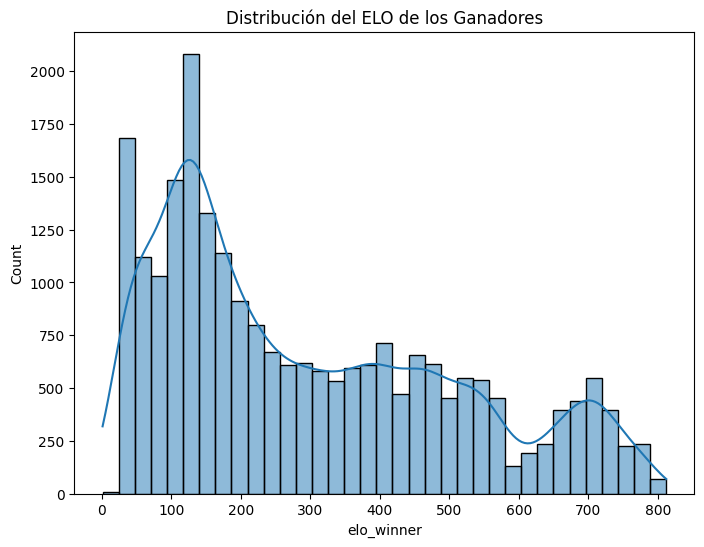

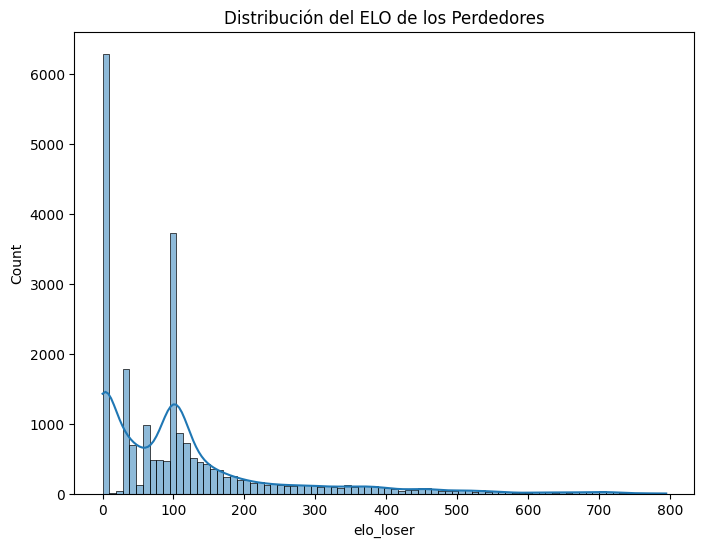

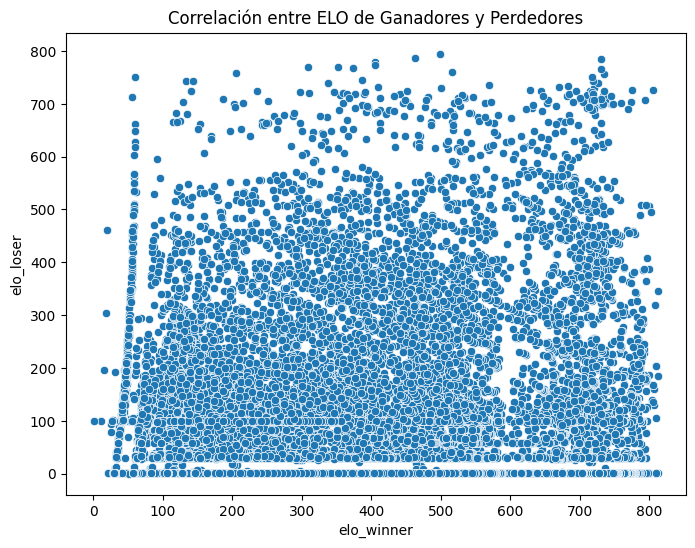

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Gráfico de la distribución de los ELOs de los ganadores
plt.figure(figsize=(8,6))
sns.histplot(df['elo_winner'], kde=True)
plt.title('Distribución del ELO de los Ganadores')
plt.show()

# Gráfico de la distribución de los ELOs de los perdedores
plt.figure(figsize=(8,6))
sns.histplot(df['elo_loser'], kde=True)
plt.title('Distribución del ELO de los Perdedores')
plt.show()

# Análisis de correlación visual entre elo_winner y elo_loser
plt.figure(figsize=(8,6))
sns.scatterplot(x='elo_winner', y='elo_loser', data=df)
plt.title('Correlación entre ELO de Ganadores y Perdedores')
plt.show()


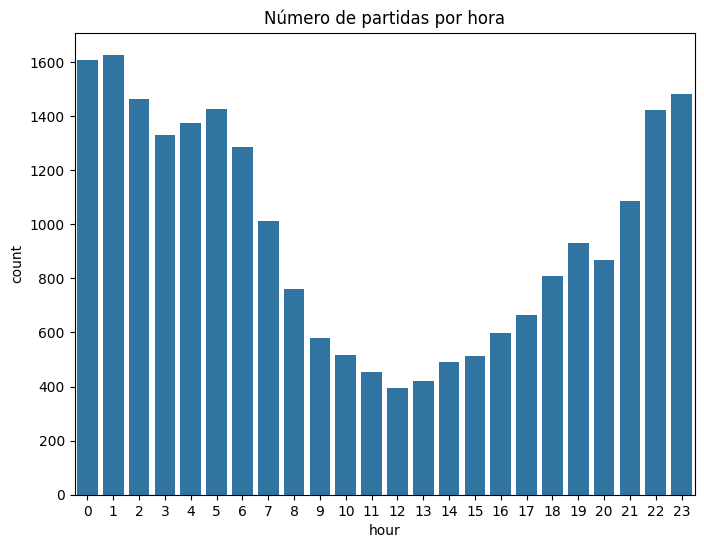

In [19]:
# Ver la cantidad de partidas por hora
df['hour'] = df['date'].dt.hour

plt.figure(figsize=(8,6))
sns.countplot(x='hour', data=df)
plt.title('Número de partidas por hora')
plt.show()
